Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score

Load game category dataset

In [2]:
df = pd.read_csv(r"C:\Users\balak\Downloads\game.csv")
df

,fsn_id,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_analytic_super_category,...,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,ACCCZ34CBVZJTVQF,2015,10,1408216975064600,1408216975064600,3075.0,1,COD,9.0,CE,...,Unverified Data,17.500000,8.000000,12.800000,5.200000,0.00000,0.000000,0.000000,0.000000,0.000000
1,ACCCZ34CBVZJTVQF,2015,10,1416985339691600,1416985339691600,2750.0,1,COD,7.0,CE,...,Data Not Recorded,18.350679,8.413203,13.732029,6.428851,2.16088,2.936404,0.241228,3.177632,1.239035
2,ACCCZ34CBVZJTVQF,2015,10,1417669228375400,1417669228375400,2899.0,1,Prepaid,5.0,CE,...,Unverified Data,19.500000,8.413203,13.732029,6.428851,2.16088,1.200000,0.000000,1.200000,0.000000
3,ACCCZ34CBVZJTVQF,2015,10,1419414998353400,1419414998353400,2609.0,1,Prepaid,5.0,CE,...,Unverified Data,9.000000,8.413203,13.732029,6.428851,2.16088,0.000000,0.000000,0.000000,0.000000
4,ACCCZ34CBVZJTVQF,2015,10,1427167582532600,1427167582532600,2772.0,1,Prepaid,5.0,CE,...,Unverified Data,15.500000,3.033007,8.800000,9.200000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325378,GMCEYRP3ZXAJGDC6,2015,9,2392596932127600,2392596932127600,1850.0,1,COD,5.0,CE,...,Unverified Data,27.500000,13.000000,20.300000,0.000000,2.30000,0.000000,0.000000,0.000000,0.000000
325379,GMCEYRP3ZXAJGDC6,2015,9,4396231126143700,4396231126143700,1970.0,1,COD,11.5,CE,...,Unverified Data,18.350679,8.413203,13.732029,6.428851,2.16088,0.000000,0.000000,0.000000,0.000000
325380,GMCEYRP3ZXAJGDC6,2015,9,1400493663474000,1400493663474000,1970.0,1,COD,9.0,CE,...,Data Not Recorded,18.350679,8.413203,13.732029,6.428851,2.16088,2.936404,0.241228,3.177632,1.239035
325381,GMCEYRP3ZXAJGDC6,2015,9,3402697506464300,3402697506464300,1970.0,1,COD,7.0,CE,...,Unverified Data,26.500000,17.380196,22.800000,0.000000,4.80000,0.000000,0.000000,0.000000,0.000000


Clean dataset

remove duplicates

In [3]:
df = df.drop_duplicates()
df.shape

(324932, 26)

Checking Missing values

In [4]:
df.isnull().sum()

fsn_id                             0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
s1_fact.order_payment_type         0
sla                                0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
Day                                0
Data Quality                       0
Max Temp (°C)                      0
Min Temp (°C)                      0
Mean Temp (°C)                     0
Heat Deg Days (°C)                 0
Cool Deg Days (°C)                 0
Total Rain (mm)                    0
Total Snow (cm)                    0
Total Precip (mm)                  0
Snow on Grnd (cm)                  0
dtype: int64

Checking datatype

In [5]:
df.dtypes

fsn_id                              object
Year                                 int64
Month                                int64
order_id                             int64
order_item_id                        int64
gmv                                float64
units                                int64
s1_fact.order_payment_type          object
sla                                float64
product_analytic_super_category     object
product_analytic_category           object
product_analytic_sub_category       object
product_analytic_vertical           object
product_mrp                          int64
product_procurement_sla              int64
Day                                  int64
Data Quality                        object
Max Temp (°C)                      float64
Min Temp (°C)                      float64
Mean Temp (°C)                     float64
Heat Deg Days (°C)                 float64
Cool Deg Days (°C)                 float64
Total Rain (mm)                    float64
Total Snow 

In [7]:
cont_col=cat_col = df.select_dtypes(exclude=['object','datetime64[ns]']).columns
cont_col

Index(['Year', 'Month', 'order_id', 'order_item_id', 'gmv', 'units', 'sla',
       'product_mrp', 'product_procurement_sla', 'Day', 'Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)',
       'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [6]:
outlier = df[['order_id', 'order_item_id', 'gmv', 'units', 'sla',
       'product_mrp', 'product_procurement_sla',  'Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)',
       'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)']]

Checking outliers

In [7]:
for column in outlier:

    print(f"Column : {column}")
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5 * iqr)
    print(f"UpperThreshold : {upper_threshold} and lowerThreshold : {lower_threshold}")

    print(df[column].describe())
    print('**********************')

Column : order_id
UpperThreshold : 6640516072304625.0 and lowerThreshold : -1413851721441975.0
count    3.249320e+05
mean     2.864048e+15
std      1.272572e+15
min      1.629576e+08
25%      1.606536e+15
50%      2.614479e+15
75%      3.620128e+15
max      4.641665e+15
Name: order_id, dtype: float64
**********************
Column : order_item_id
UpperThreshold : 8562859759733725.0 and lowerThreshold : -2564170209709275.0
count    3.249320e+05
mean     2.934295e+15
std      1.377717e+15
min      2.072001e+08
25%      1.608466e+15
50%      2.618180e+15
75%      4.390224e+15
max      6.704216e+15
Name: order_item_id, dtype: float64
**********************
Column : gmv
UpperThreshold : 4487.5 and lowerThreshold : -2148.5
count    324932.000000
mean       1322.539851
std        1260.219163
min           0.000000
25%         340.000000
50%         799.000000
75%        1999.000000
max        4487.500000
Name: gmv, dtype: float64
**********************
Column : units
UpperThreshold : 1.0 and l

In [12]:
def plot(df,column):
  #boxplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.boxplot(x=df[column], color='skyblue')
  plt.xlabel(column)
  plt.title("Box Plot of "+" "+column)

  #distplot

  plt.subplot(1,3,2)
  sns.distplot(df[column],kde=True,color='blue')
  plt.xlabel(column)
  plt.ylabel("count")
  plt.title("Distplot for"+" "+column)

  #violinplot

  plt.subplot(1,3,3)
  sns.violinplot(data=df, x=column)
  plt.title("violin plot for"+" "+column)

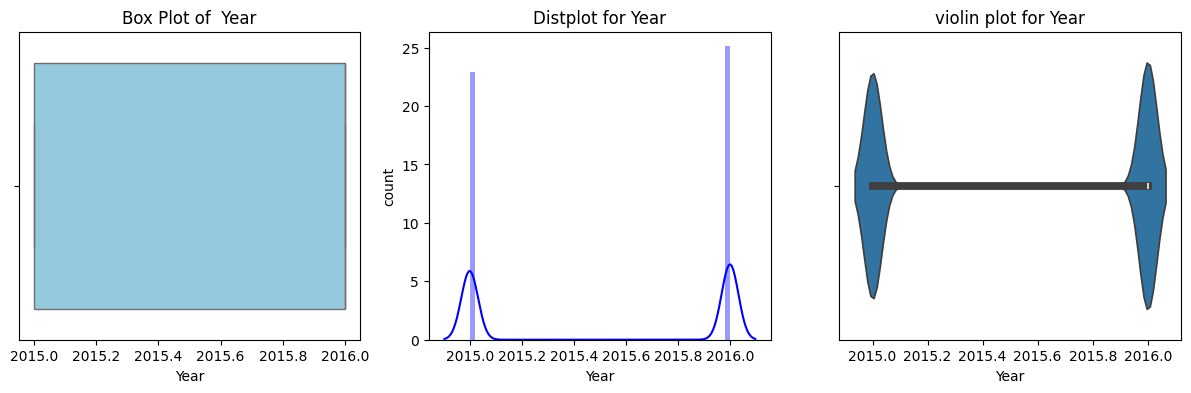

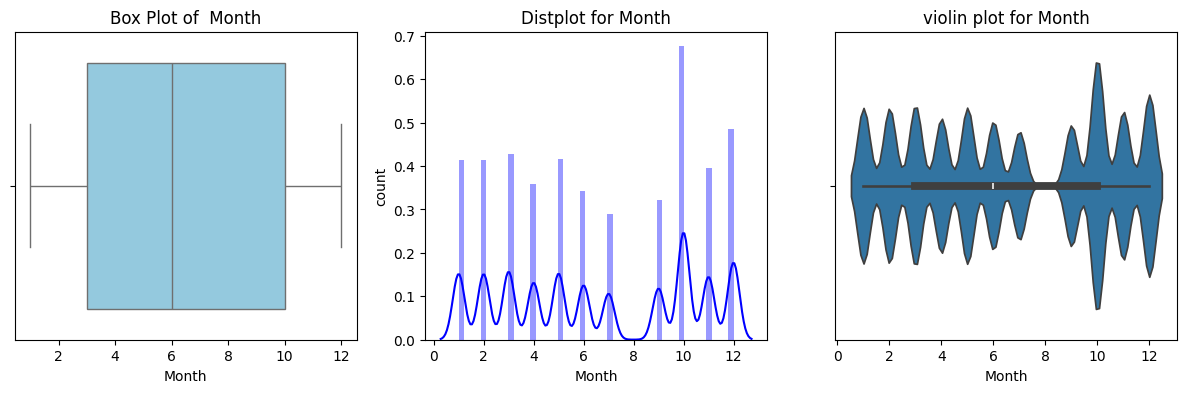

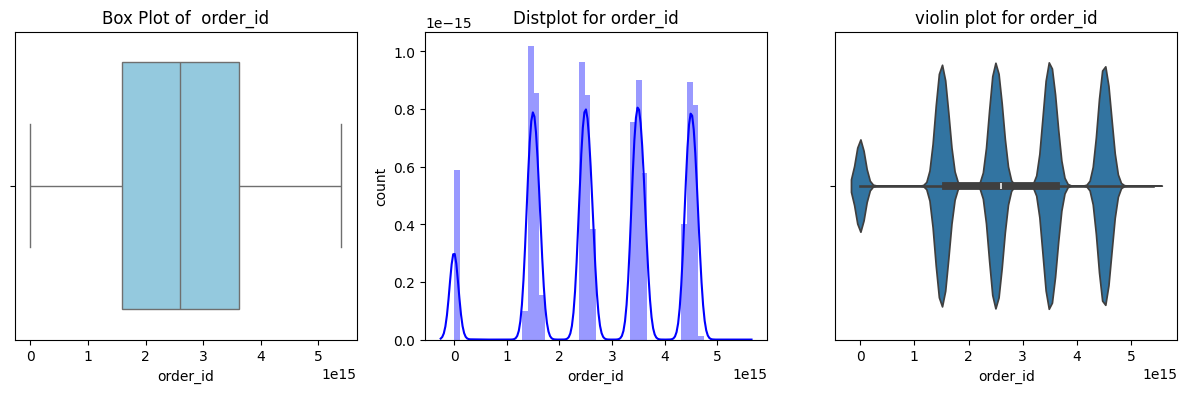

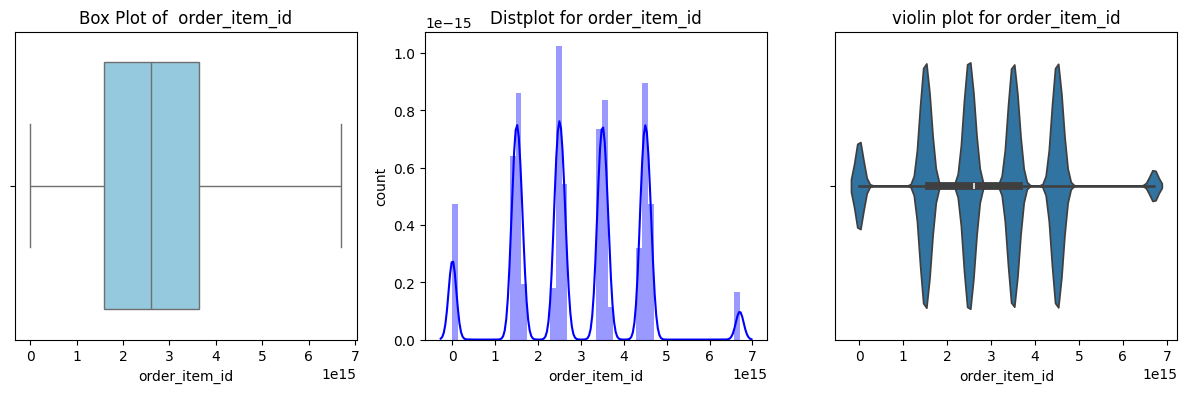

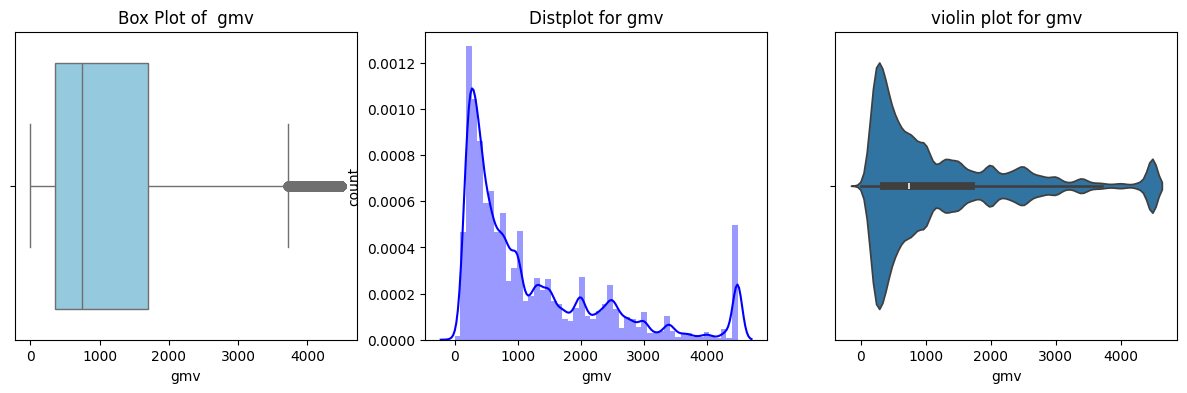

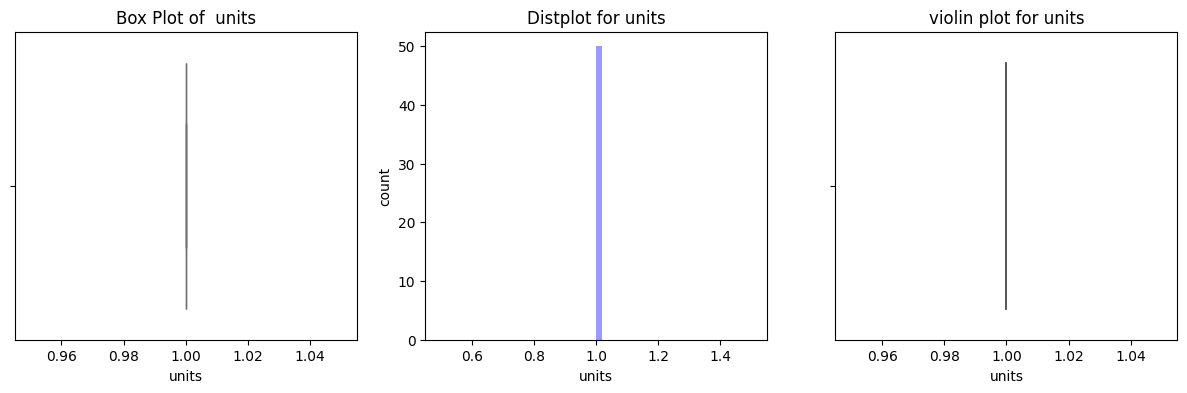

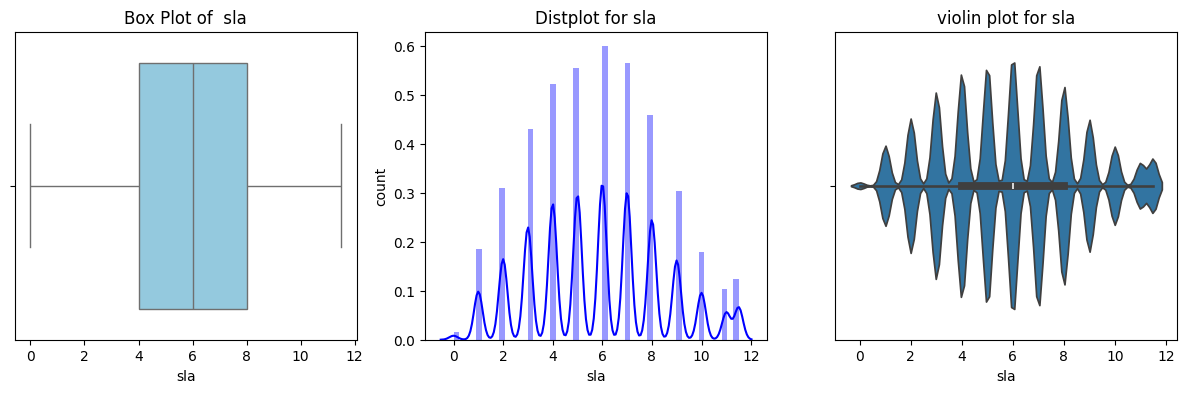

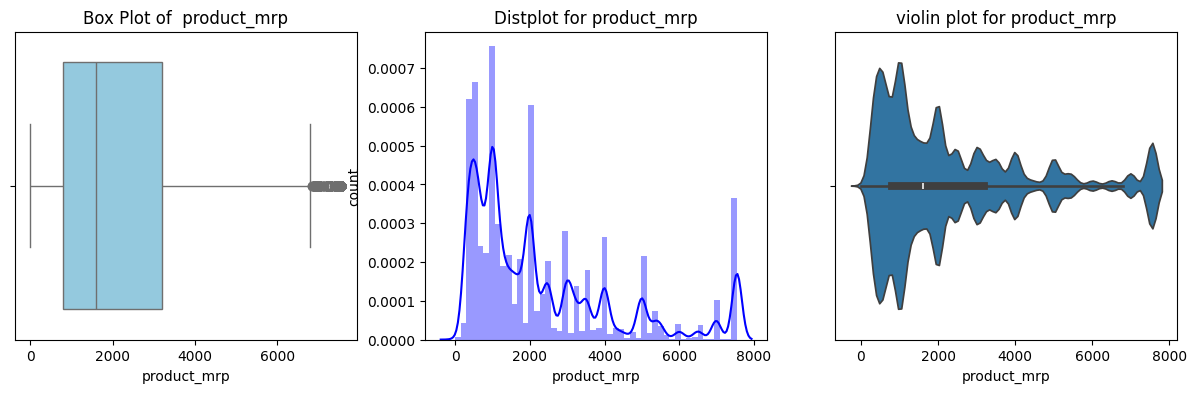

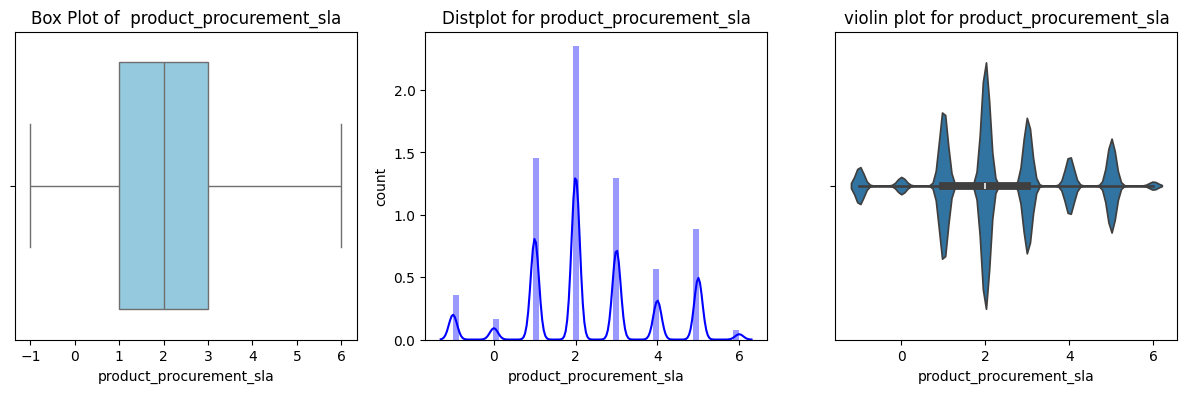

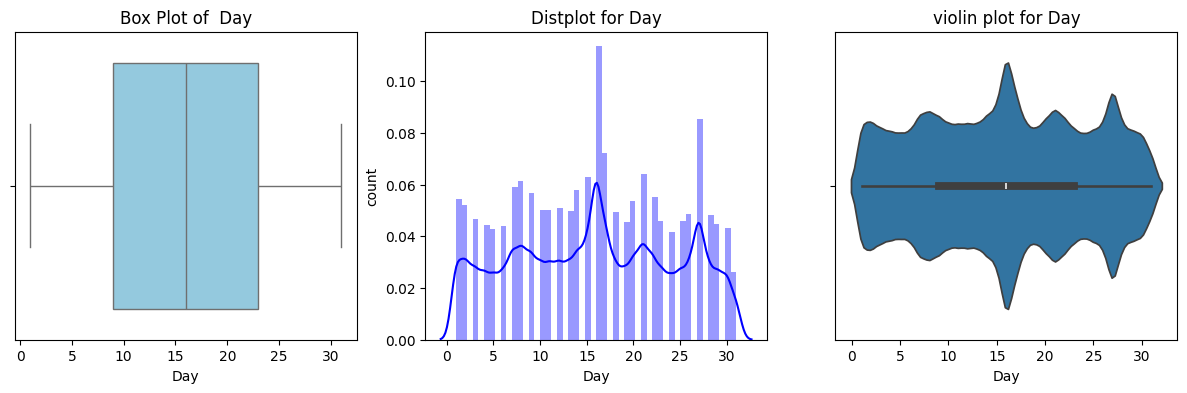

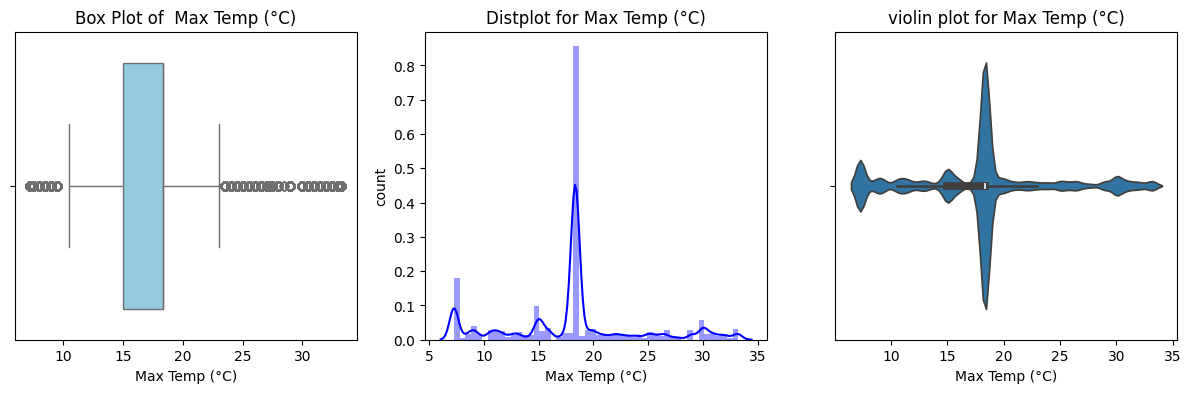

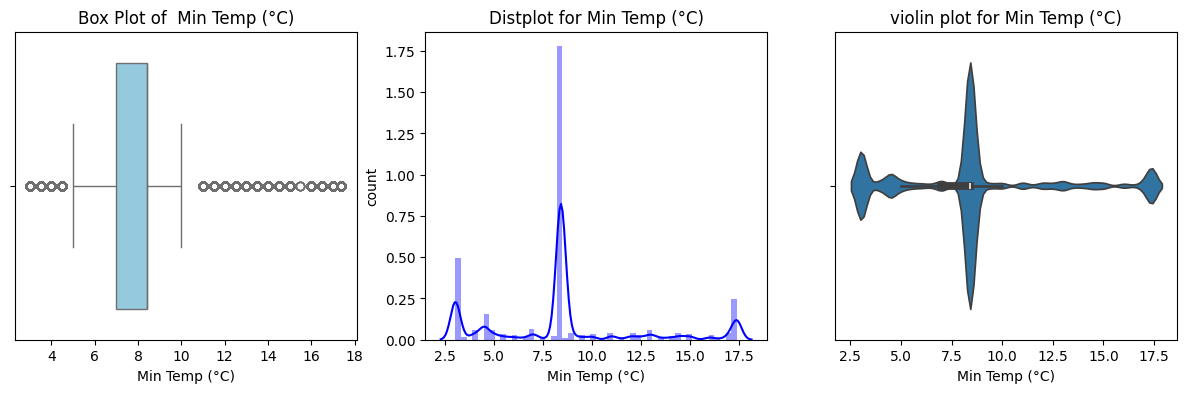

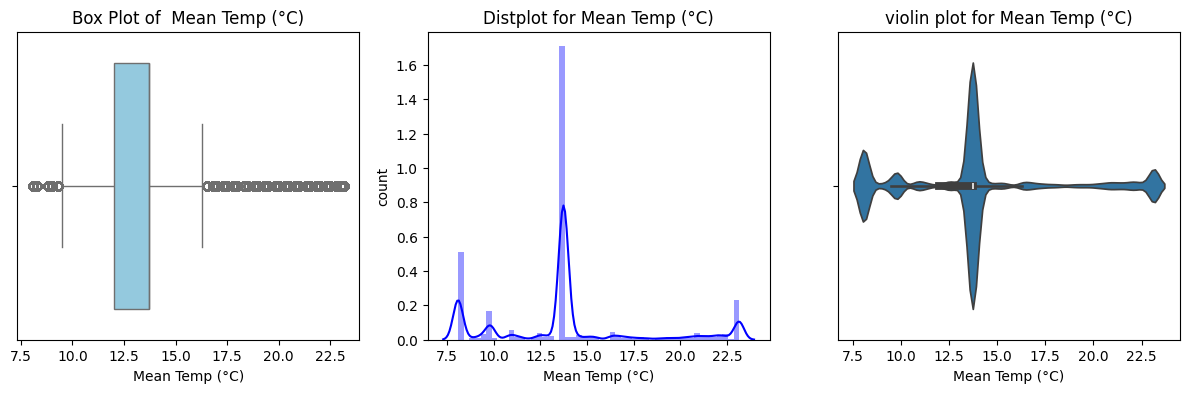

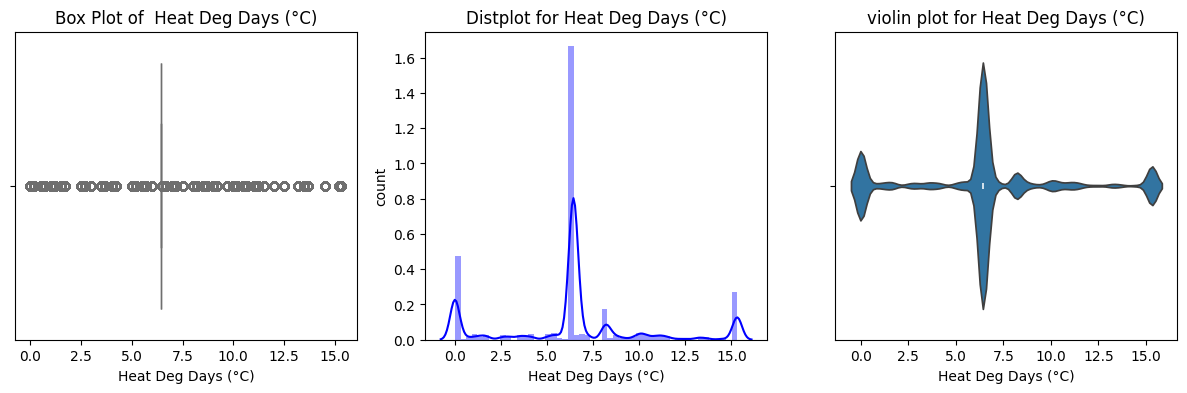

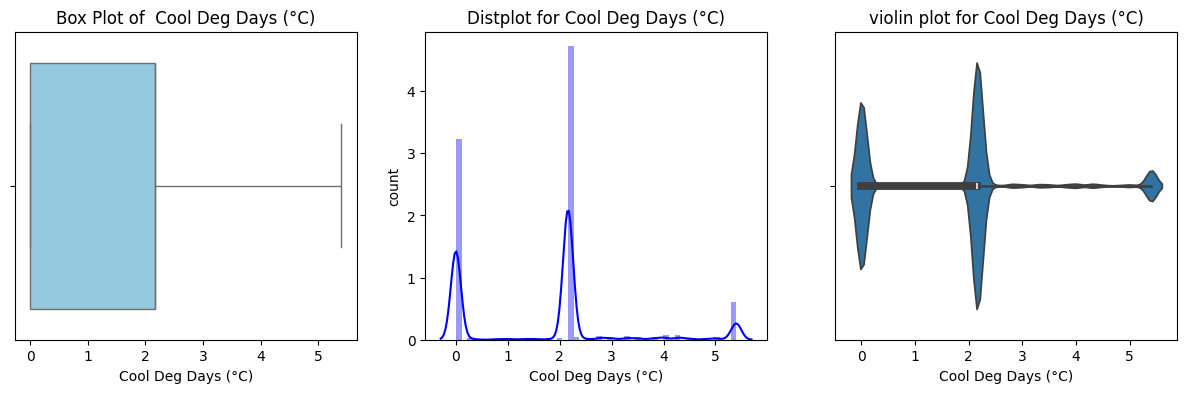

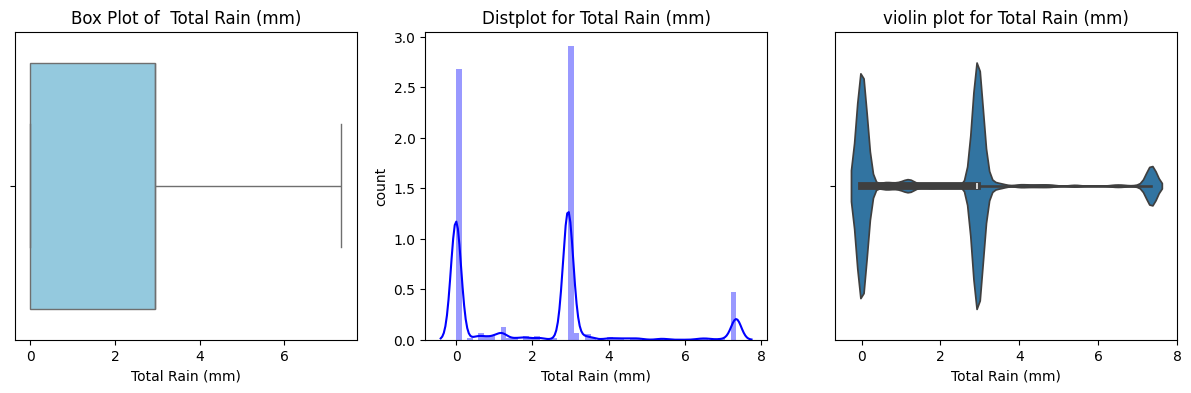

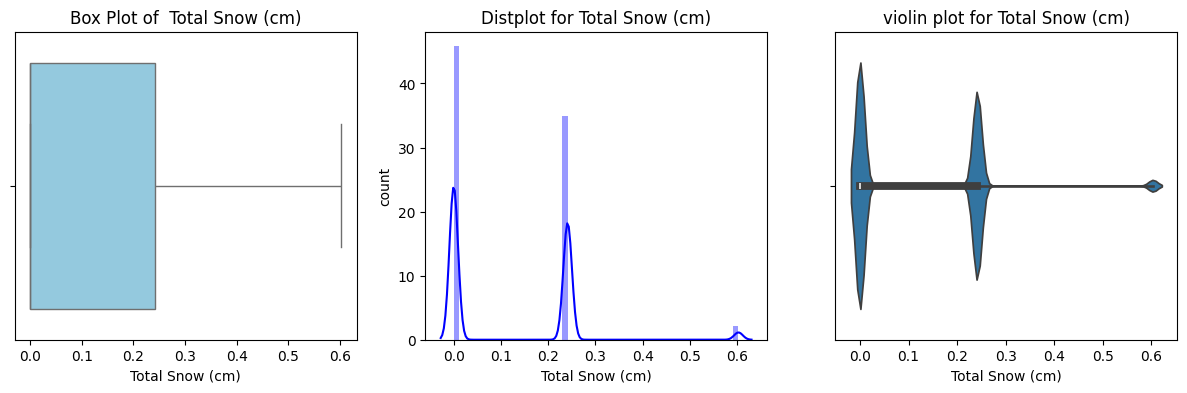

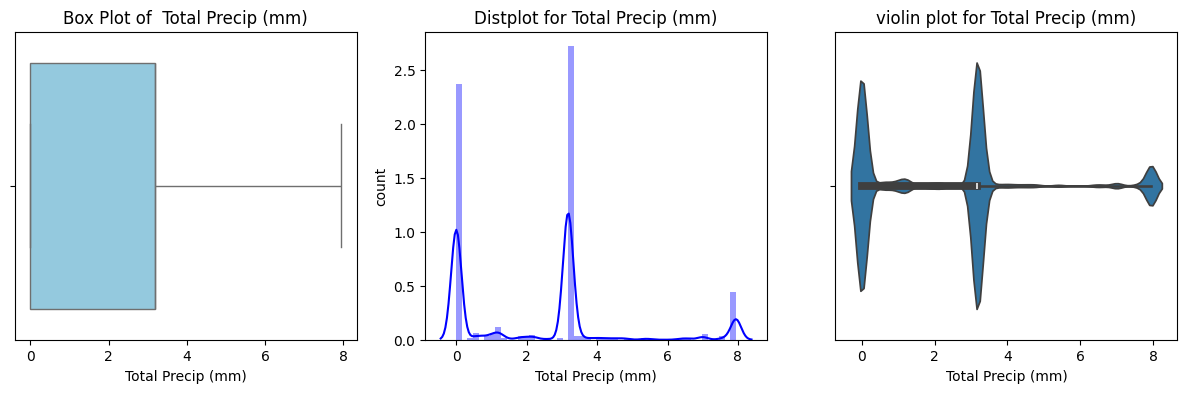

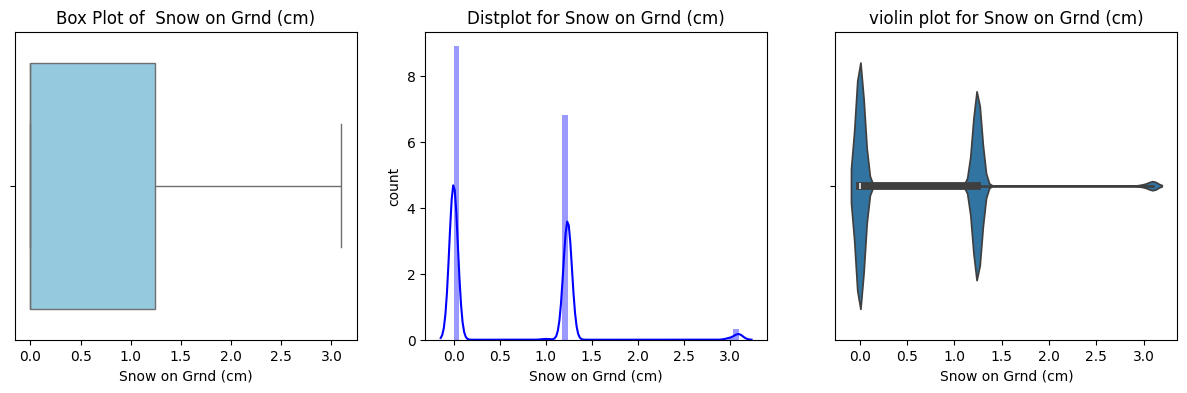

In [13]:
for i in cont_col:
  plot(df,i)

removing outliers

In [7]:
for column in outlier:

    print(f"Column : {column}")

    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5 * iqr)
    print(f"UpperThreshold : {upper_threshold} and lowerThreshold : {lower_threshold}")

    df[column] = df[column].clip(lower_threshold, upper_threshold)   #cliping- removing outliers
    print(df[column].describe())


    print('**********************')

Column : order_id
UpperThreshold : 6640516072304625.0 and lowerThreshold : -1413851721441975.0
count    3.249320e+05
mean     2.864048e+15
std      1.272572e+15
min      1.629576e+08
25%      1.606536e+15
50%      2.614479e+15
75%      3.620128e+15
max      4.641665e+15
Name: order_id, dtype: float64
**********************
Column : order_item_id
UpperThreshold : 8562859759733725.0 and lowerThreshold : -2564170209709275.0
count    3.249320e+05
mean     2.934295e+15
std      1.377717e+15
min      2.072001e+08
25%      1.608466e+15
50%      2.618180e+15
75%      4.390224e+15
max      6.704216e+15
Name: order_item_id, dtype: float64
**********************
Column : gmv
UpperThreshold : 4487.5 and lowerThreshold : -2148.5
count    324932.000000
mean       1322.539851
std        1260.219163
min           0.000000
25%         340.000000
50%         799.000000
75%        1999.000000
max        4487.500000
Name: gmv, dtype: float64
**********************
Column : units
UpperThreshold : 1.0 and l

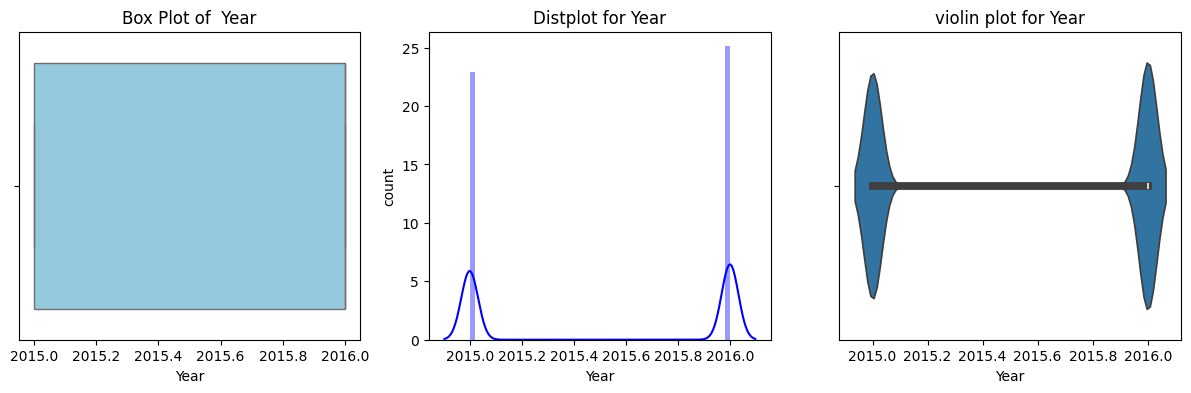

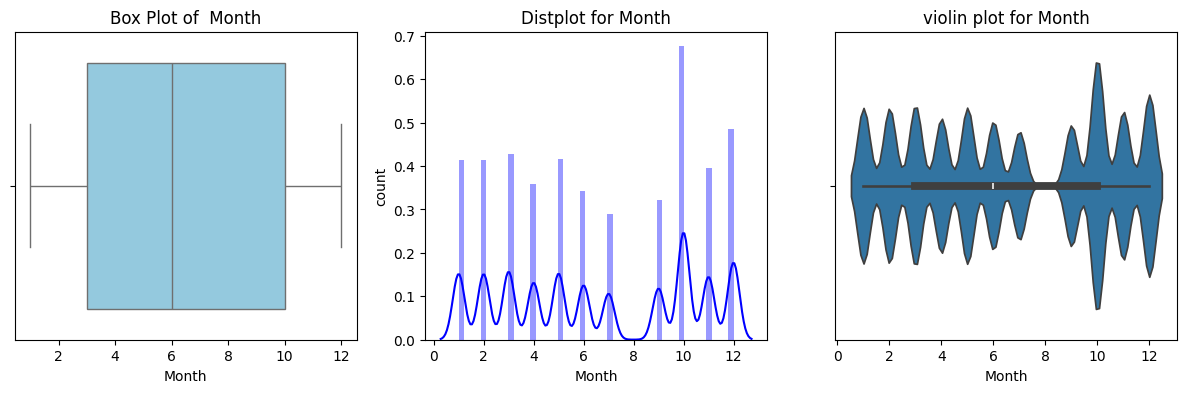

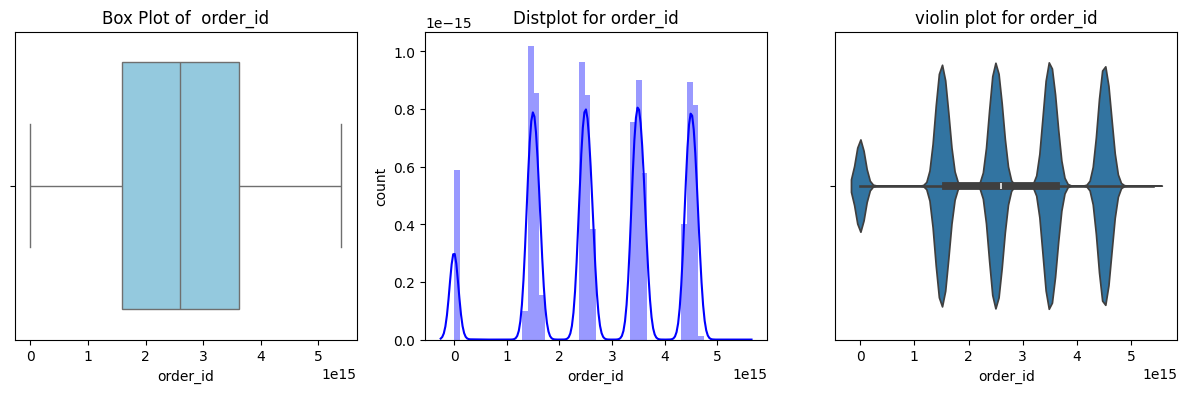

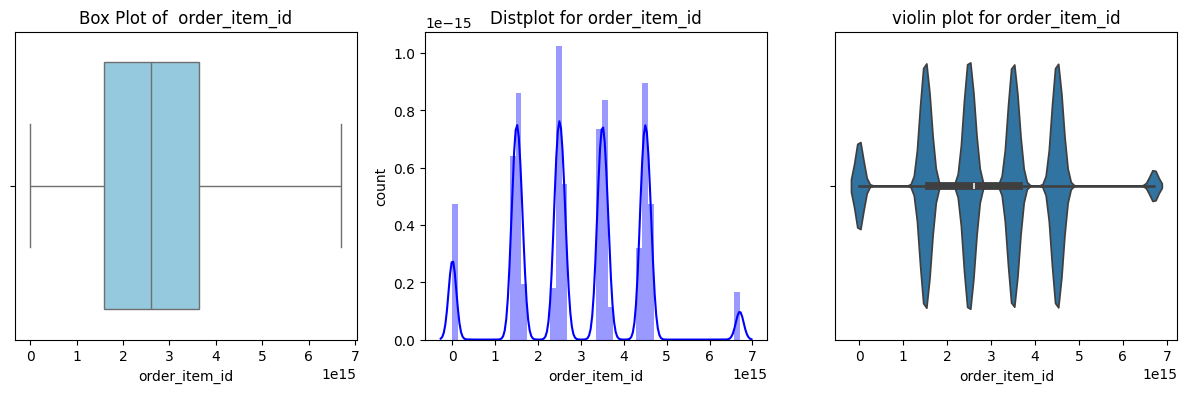

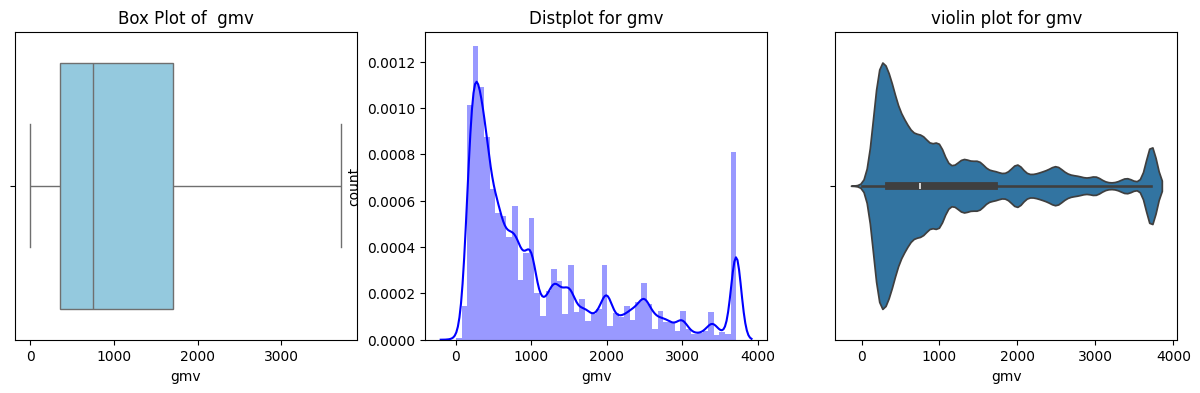

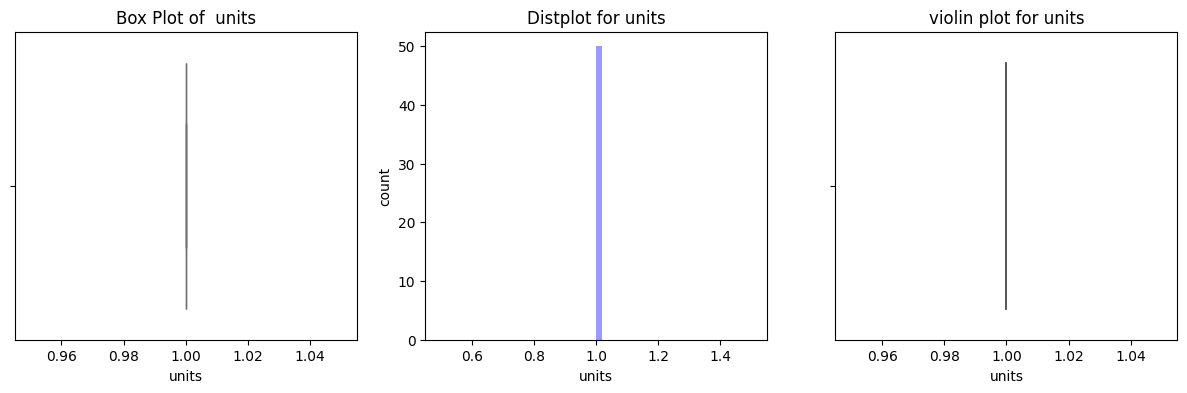

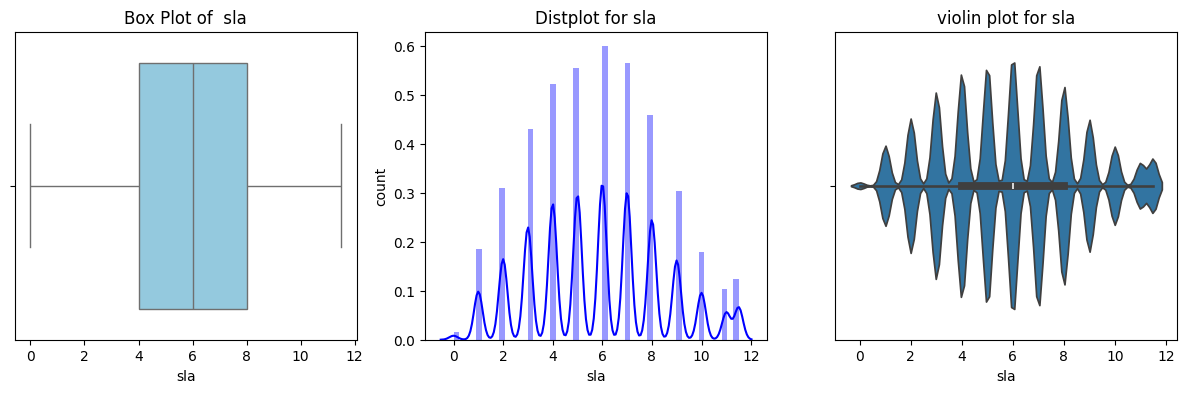

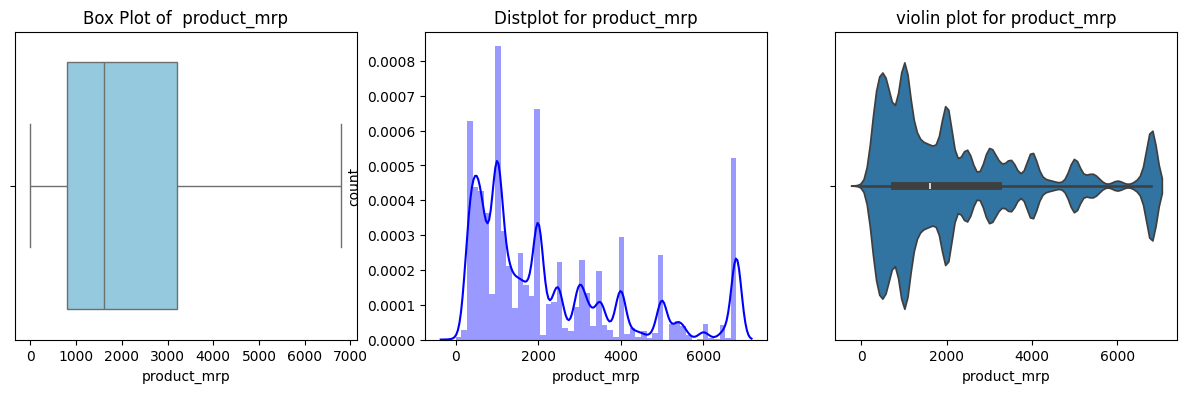

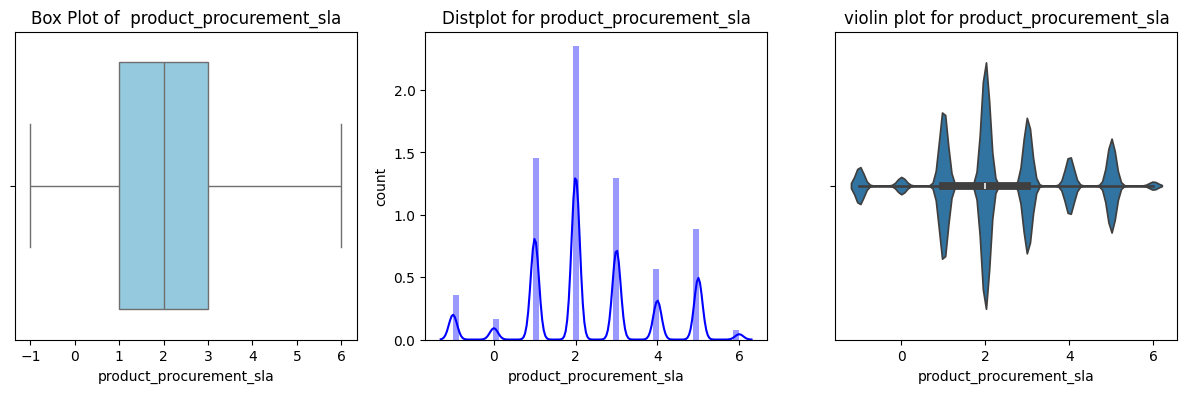

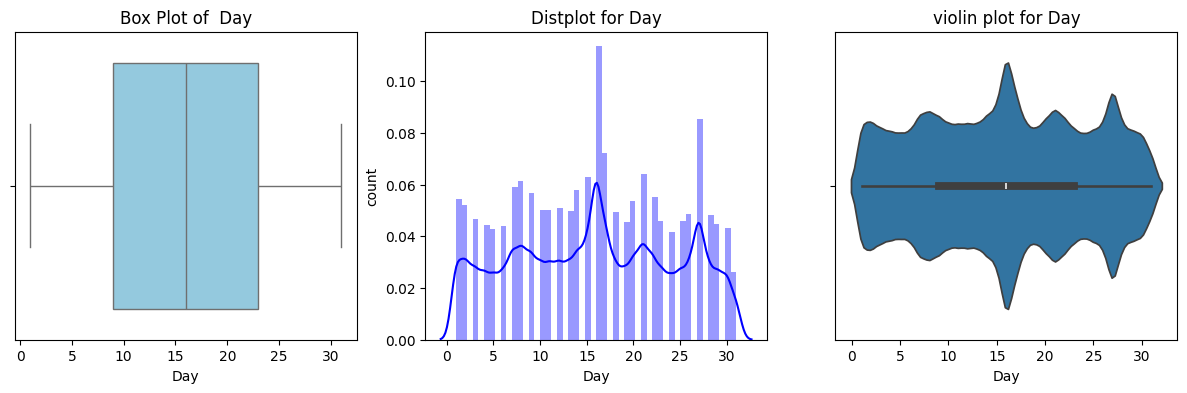

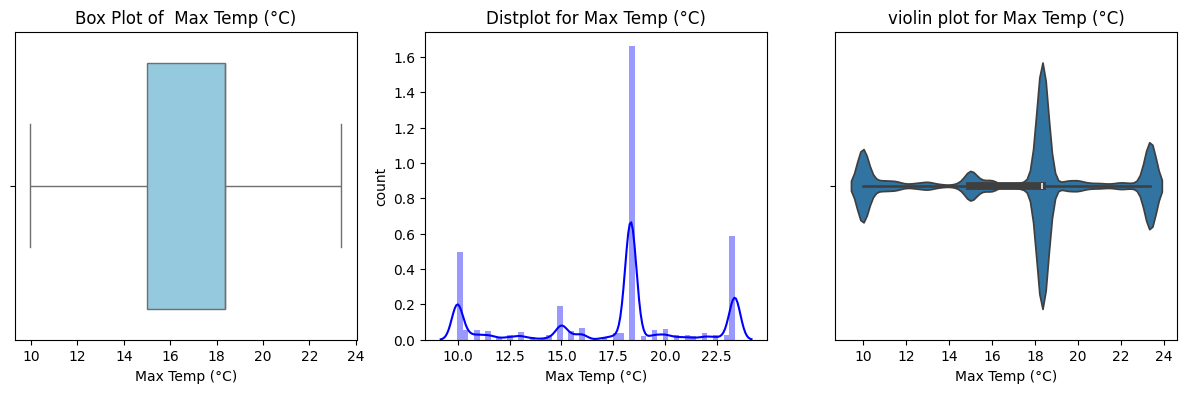

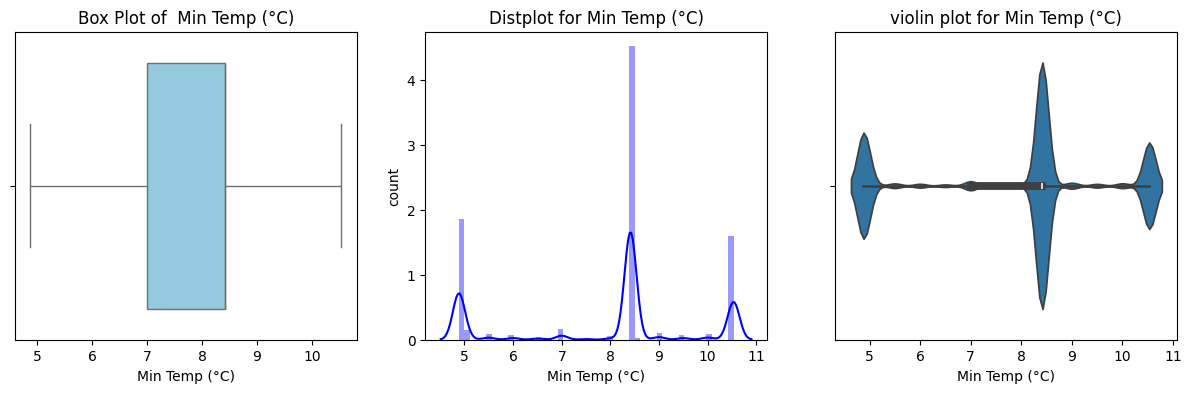

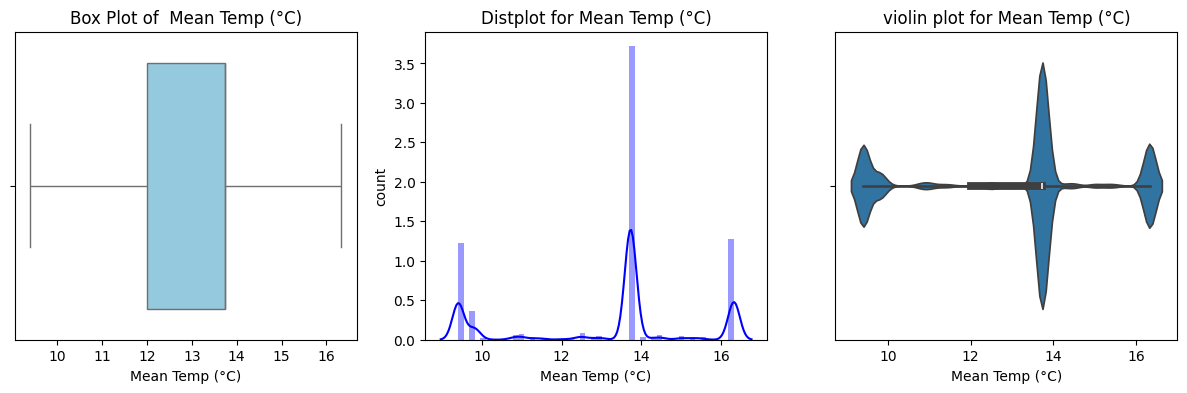

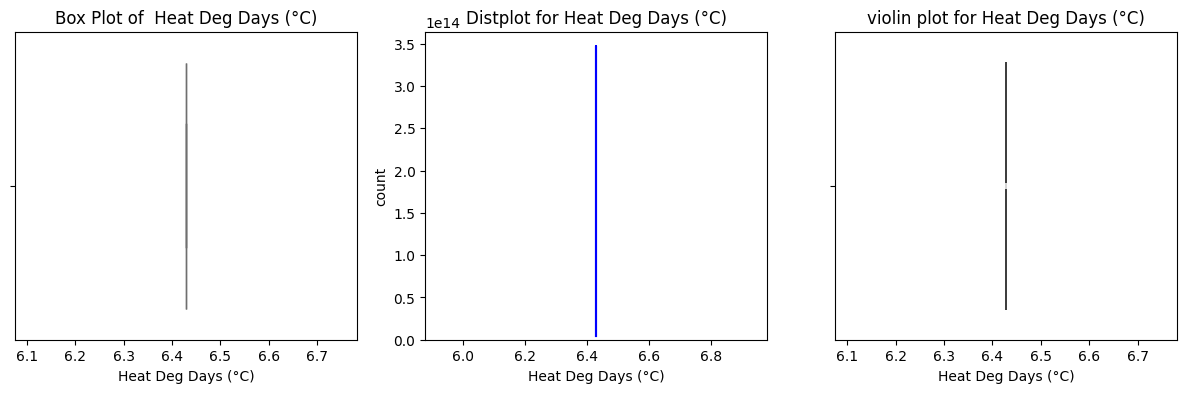

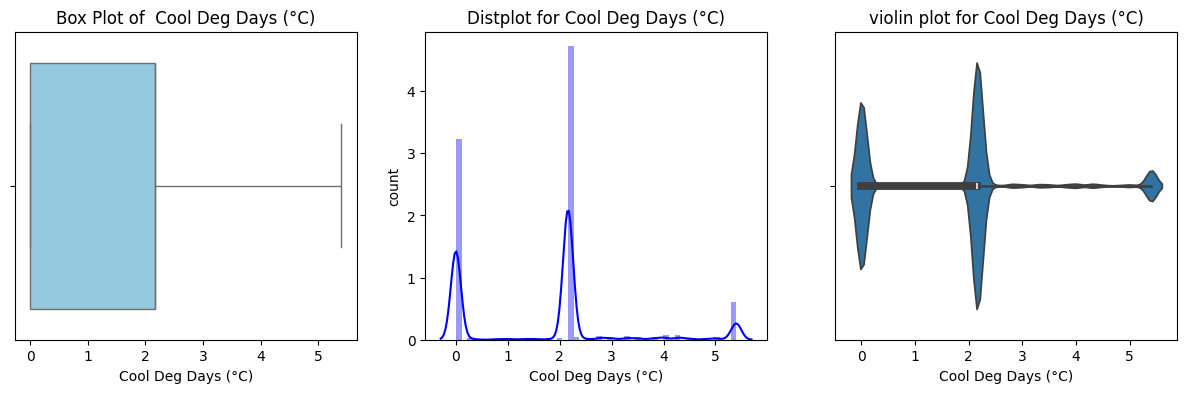

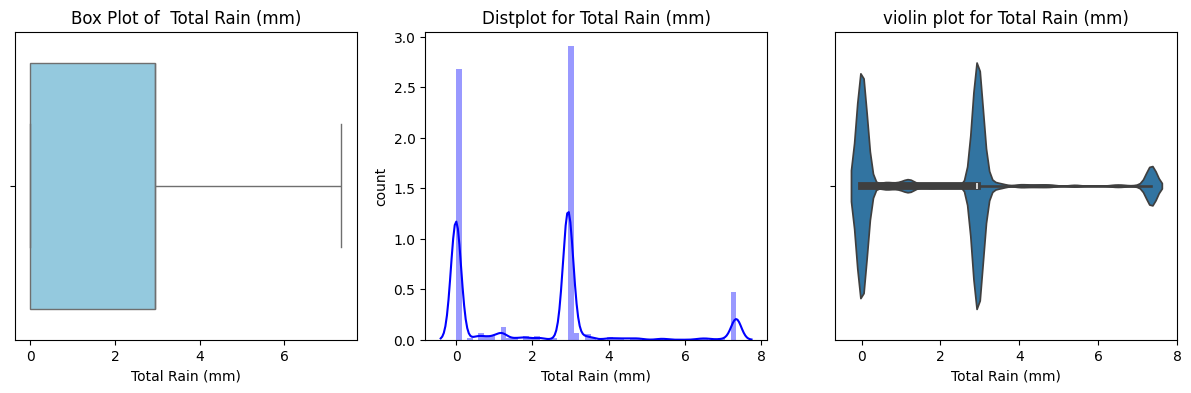

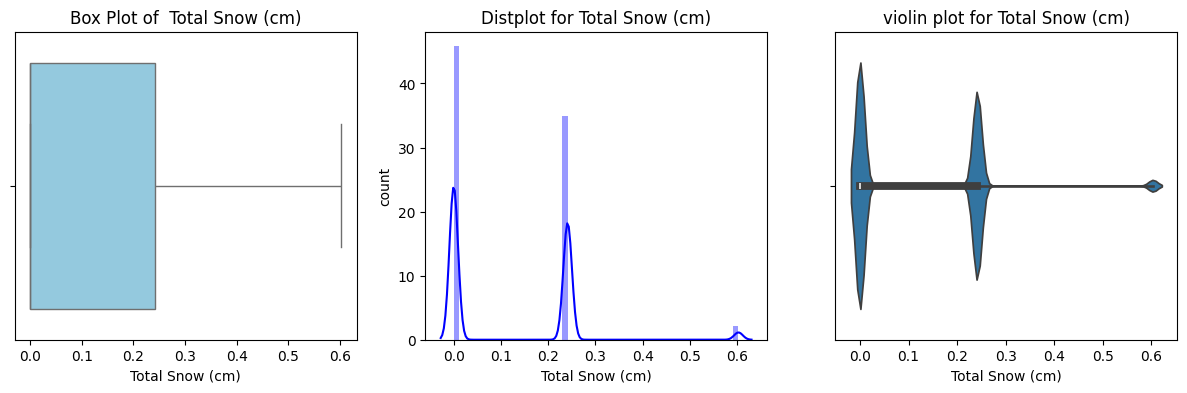

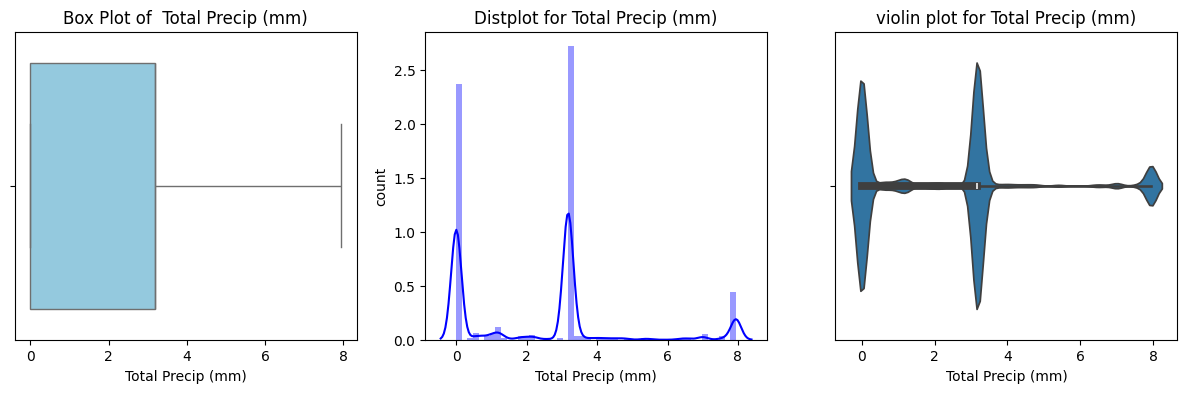

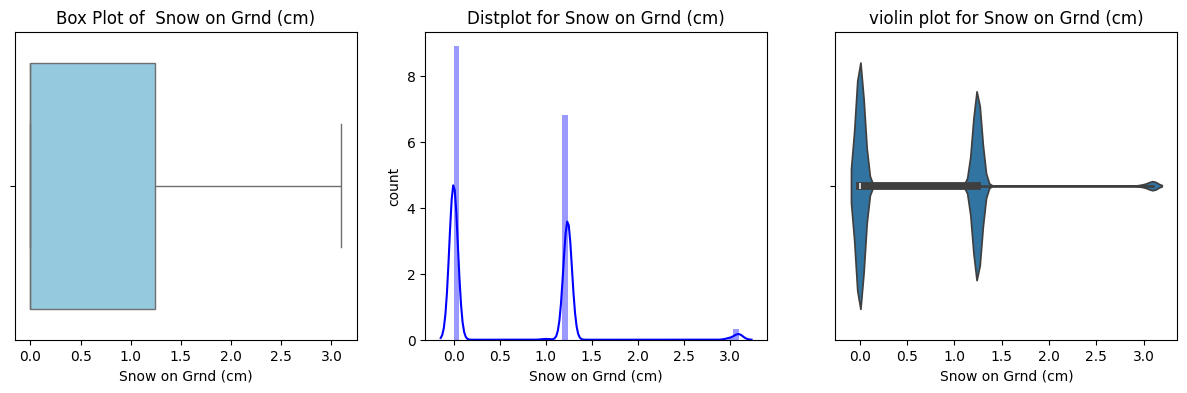

In [15]:
for i in cont_col:
  plot(df,i)

In [11]:
cat_col=cat_col = df.select_dtypes(include=['object','datetime64[ns]']).columns
cat_col

Index(['fsn_id', 's1_fact.order_payment_type',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'Data Quality'],
      dtype='object')

EDA and Encode

In [9]:
df['fsn_id'].value_counts()

fsn_id
ACCECYHH4QDNZXEX    13628
ACCDH7MFZJGRWJCW     7247
ACCDTREV54TU7YFE     3763
AVMDF2BYAVZDHCK2     3406
AVMDX6TFZZQM7SXJ     3306
                    ...  
ACCEGTFCXSD6GHTE        1
ACCEGTFCN4BMS2VJ        1
ACCEGTFC95YHKZZX        1
ACCEGTFC6KA6CAYQ        1
GMCEAXFS3ZGCGXEP        1
Name: count, Length: 5033, dtype: int64

In [10]:
df['fsn_id'].nunique()

5033

payment_type

In [11]:
df['s1_fact.order_payment_type'].value_counts()

s1_fact.order_payment_type
COD        238009
Prepaid     86923
Name: count, dtype: int64

In [12]:
df.groupby('s1_fact.order_payment_type')['gmv'].mean().sort_values(ascending=False)

s1_fact.order_payment_type
Prepaid    1546.743417
COD        1240.658719
Name: gmv, dtype: float64

In [8]:
df['s1_fact.order_payment_type'] = df['s1_fact.order_payment_type'].map({'Prepaid':2, 'COD':1})

product_analytic_super_category

In [14]:
df['product_analytic_super_category'].value_counts()

product_analytic_super_category
CE    324932
Name: count, dtype: int64

In [15]:
df.groupby('product_analytic_super_category')['gmv'].mean()

product_analytic_super_category
CE    1322.539851
Name: gmv, dtype: float64

In [9]:
df['product_analytic_super_category'] = df['product_analytic_super_category'].map({'CE':1})

product_analytic_category

In [17]:
df['product_analytic_category'].value_counts()

product_analytic_category
GamingHardware    324932
Name: count, dtype: int64

In [10]:
df['product_analytic_category'] = df['product_analytic_category'].map({'GamingHardware':1})

product_analytic_sub_category

In [19]:
df['product_analytic_sub_category'].value_counts()

product_analytic_sub_category
GamingAccessory        189513
Game                   107658
GamingConsole           27664
GameMembershipCards        97
Name: count, dtype: int64

In [20]:
df.groupby('product_analytic_sub_category')['gmv'].mean().sort_values(ascending=False)

product_analytic_sub_category
GamingConsole          2788.574230
Game                   1844.144783
GamingAccessory         812.665324
GameMembershipCards     462.051546
Name: gmv, dtype: float64

In [11]:
df['product_analytic_sub_category'] = df['product_analytic_sub_category'].map({'GamingConsole':4, 'Game':3, 'GamingAccessory':2, 'GameMembershipCards':1})

product_analytic_vertical

In [22]:
df['product_analytic_vertical'].value_counts()

product_analytic_vertical
PhysicalGame             98612
GamingHeadset            60031
GamePad                  53799
GamingMouse              35760
HandheldGamingConsole    18203
GamingConsole             9461
CodeInTheBoxGame          9046
GamingAccessoryKit        8823
TVOutCableAccessory       6773
GamingKeyboard            6440
GamingMemoryCard          5973
GamingMousePad            4418
GamingAdapter             3077
JoystickGamingWheel       2709
MotionController          1113
GamingSpeaker              499
GameValueCards              97
GamingChargingStation       47
CoolingPad                  46
GamingGun                    4
GameControlMount             1
Name: count, dtype: int64

In [23]:
df.groupby('product_analytic_vertical')['gmv'].mean().sort_values(ascending=False)

product_analytic_vertical
GamingConsole            4472.224923
MotionController         3152.730009
GameControlMount         2099.000000
PhysicalGame             1944.557087
HandheldGamingConsole    1913.497638
GamingGun                1665.000000
GamingKeyboard           1447.463975
JoystickGamingWheel      1290.150425
GamingChargingStation    1253.234043
GamePad                  1137.199493
CoolingPad                854.521739
GamingSpeaker             752.585170
GamingMouse               749.847092
CodeInTheBoxGame          749.532998
GamingMousePad            735.476234
GamingMemoryCard          727.915620
GamingAdapter             674.723919
GamingAccessoryKit        583.575995
GamingHeadset             525.702887
GameValueCards            462.051546
TVOutCableAccessory       417.403292
Name: gmv, dtype: float64

In [24]:
df['product_analytic_vertical'].nunique()

21

In [12]:
df['product_analytic_vertical'] = df['product_analytic_vertical'].map({'TVOutCableAccessory':1, 'GameValueCards':2 ,'GamingHeadset':3, 'GamingAccessoryKit':4,'GamingAdapter':5, 'GamingMemoryCard':6, 'GamingMousePad':7, 'CodeInTheBoxGame':8,
'GamingMouse':9, 'GamingSpeaker':10, 'CoolingPad':11, 'GamePad':12, 'GamingChargingStation':13, 'JoystickGamingWheel':14, 'GamingKeyboard':15, 'GamingGun':16,
'HandheldGamingConsole':17, 'PhysicalGame':18, 'GameControlMount':19, 'MotionController':20, 'GamingConsole':21 })

Data Quality

In [26]:
df['Data Quality'].value_counts()

Data Quality
Unverified Data      186059
Data Not Recorded    138873
Name: count, dtype: int64

In [27]:
df.groupby('Data Quality')['gmv'].mean().sort_values(ascending=False)

Data Quality
Data Not Recorded    1325.564206
Unverified Data      1320.282496
Name: gmv, dtype: float64

In [13]:
df['Data Quality'] = df['Data Quality'].map({'Unverified Data':1, 'Data Not Recorded':2})

In [29]:
df.head()

,fsn_id,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_analytic_super_category,...,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,ACCCZ34CBVZJTVQF,2015,10,1408216975064600,1408216975064600,3075.0,1,1,9.0,1,...,1,17.500000,8.000000,12.800000,5.200000,0.00000,0.000000,0.000000,0.000000,0.000000
1,ACCCZ34CBVZJTVQF,2015,10,1416985339691600,1416985339691600,2750.0,1,1,7.0,1,...,2,18.350679,8.413203,13.732029,6.428851,2.16088,2.936404,0.241228,3.177632,1.239035
2,ACCCZ34CBVZJTVQF,2015,10,1417669228375400,1417669228375400,2899.0,1,2,5.0,1,...,1,19.500000,8.413203,13.732029,6.428851,2.16088,1.200000,0.000000,1.200000,0.000000
3,ACCCZ34CBVZJTVQF,2015,10,1419414998353400,1419414998353400,2609.0,1,2,5.0,1,...,1,11.000000,8.413203,13.732029,6.428851,2.16088,0.000000,0.000000,0.000000,0.000000
4,ACCCZ34CBVZJTVQF,2015,10,1427167582532600,1427167582532600,2772.0,1,2,5.0,1,...,1,15.500000,4.880196,10.151956,7.522127,0.00000,0.000000,0.000000,0.000000,0.000000


Split

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['fsn_id','gmv'])
y = df[ 'gmv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 24)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((243699, 24), (81233, 24), (243699,), (81233,))

In [47]:
X.columns

Index(['Year', 'Month', 'order_id', 'order_item_id', 'gmv', 'units',
       's1_fact.order_payment_type', 'sla', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_procurement_sla', 'Day',
       'Data Quality', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

LinearRegression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lin=LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.7456527971797979


DecisionTreeRegressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.9011723281720783


Fine tuning hyperparameters

In [34]:
from sklearn.model_selection import cross_val_score

for depth in [7,8,9,10,11,12,13,14,15,16]:
  dtr = DecisionTreeRegressor(max_depth = depth)
  dtr.fit(X_train, y_train)
  train_score = dtr.score(X_train, y_train)
  cross_val = np.mean(cross_val_score(dtr, X_train, y_train, cv = 10))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 7, TrainScore: 0.8728167577335308, Cross-ValScore: 0.8721683631239475
Depth - 8, TrainScore: 0.8963481418727284, Cross-ValScore: 0.8950227819739208
Depth - 9, TrainScore: 0.9082916365100651, Cross-ValScore: 0.9062437430551487
Depth - 10, TrainScore: 0.9209506379185607, Cross-ValScore: 0.9171141943636115
Depth - 11, TrainScore: 0.9291928121629599, Cross-ValScore: 0.9236464636481383
Depth - 12, TrainScore: 0.9357686140635638, Cross-ValScore: 0.9274102312132202
Depth - 13, TrainScore: 0.9420712855903522, Cross-ValScore: 0.9292467258675217
Depth - 14, TrainScore: 0.9486099158923524, Cross-ValScore: 0.9308031069588205
Depth - 15, TrainScore: 0.9543267321766575, Cross-ValScore: 0.9313359039670225
Depth - 16, TrainScore: 0.9590590909331814, Cross-ValScore: 0.9300804445507044


In [35]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=15)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.932113628413772


RandomForestRegressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.9412808763858018


XGBRegressor

In [42]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.9325047645636818


Fine tuning hyperparameters

In [38]:
from xgboost import XGBRegressor

for lamb in [0,0.5,1,1.5]:
  xgbr = XGBRegressor(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(xgbr, X_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0, Cross-Val Score: -5.577127086098255e-05
Lambda: 0.5, Cross-Val Score: 0.9368081579564705
Lambda: 1, Cross-Val Score: 0.9335917093531432
Lambda: 1.5, Cross-Val Score: 0.9229873774897817


In [39]:
from xgboost import XGBRegressor

for lamb in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  xgbr = XGBRegressor(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(xgbr, X_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.1, Cross-Val Score: 0.9216649989005008
Lambda: 0.2, Cross-Val Score: 0.9307193739199775
Lambda: 0.3, Cross-Val Score: 0.934202612499349
Lambda: 0.4, Cross-Val Score: 0.9360125686943839
Lambda: 0.5, Cross-Val Score: 0.9368081579564705
Lambda: 0.6, Cross-Val Score: 0.9365198826568479
Lambda: 0.7, Cross-Val Score: 0.9363100534660515
Lambda: 0.8, Cross-Val Score: 0.935457529623118
Lambda: 0.9, Cross-Val Score: 0.9351979052734098


In [40]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(lerning_rate = 0.5)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.9325047645636818


Feedforward Neural Networks (FNN)

In [22]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential()

model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))


model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")

predictions = model.predict(X_test_scaled)

r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2}")



Epoch 1/20
6093/6093 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 762021.6250 - val_loss: 351027.0312
Epoch 2/20
6093/6093 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 346138.5938 - val_loss: 324140.1562
Epoch 3/20
6093/6093 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 315510.5312 - val_loss: 297061.7812
Epoch 4/20
6093/6093 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 298602.5938 - val_loss: 285749.2188
Epoch 5/20
6093/6093 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 287169.6250 - val_loss: 279916.5000
Epoch 6/20
6093/6093 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 279386.5938 - val_loss: 274267.2812
Epoch 7/20
6093/6093 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 276628.3125 - val_loss: 269351.2812
Epoch 8/20
6093/6093 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 271736.7812 - val_loss: 265908.5000
Epoch 9/20
6093/6093 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 265525.3750 - val_loss: 263331.3750
Epoch 10/20
6093/6093 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 259860.2969 - val_loss: 257862.4062
Epoch 11/

Fully connected neural network (FCNN)

In [25]:
from tensorflow.keras.layers import  Dense, Dropout


y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train_array)
y_test_scaled = scaler_y.transform(y_test_array)

model = Sequential()

model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))


model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train_scaled, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))

loss = model.evaluate(X_test_scaled, y_test_scaled)
print(f'Test Loss: {loss}')


predictions_scaled = model.predict(X_test_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled)

r2 = r2_score(y_test, predictions)
print(f'R² Score: {r2}')

print(predictions[:5])

Epoch 1/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 74s 3ms/step - loss: 0.2922 - val_loss: 0.2156
Epoch 2/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.1974 - val_loss: 0.1934
Epoch 3/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.1672 - val_loss: 0.1646
Epoch 4/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.1507 - val_loss: 0.1483
Epoch 5/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.1441 - val_loss: 0.1271
Epoch 6/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.1372 - val_loss: 0.1296
Epoch 7/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.1350 - val_loss: 0.1348
Epoch 8/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.1303 - val_loss: 0.1219
Epoch 9/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.1280 - val_loss: 0.1261
Epoch 10/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.1273 - val_loss: 0.1216
Epoch 11/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.1247 - val_loss: 0.1147
Epoch 12/20
7616/76

Recurrent Neural Network (RNN)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)


scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train_array)
y_test_scaled = scaler_y.transform(y_test_array)


X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()


model.add(SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train_rnn, y_train_scaled, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test_scaled))


loss = model.evaluate(X_test_rnn, y_test_scaled)
print(f'Test Loss: {loss}')


predictions_scaled = model.predict(X_test_rnn)
predictions = scaler_y.inverse_transform(predictions_scaled)


r2 = r2_score(y_test, predictions)
print(f'R² Score: {r2}')


print(predictions[:5])

Epoch 1/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.3707 - val_loss: 0.2092
Epoch 2/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.2387 - val_loss: 0.1883
Epoch 3/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.2204 - val_loss: 0.1772
Epoch 4/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.2130 - val_loss: 0.1734
Epoch 5/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.2046 - val_loss: 0.1626
Epoch 6/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.1992 - val_loss: 0.1544
Epoch 7/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.1949 - val_loss: 0.1588
Epoch 8/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.1930 - val_loss: 0.1473
Epoch 9/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - loss: 0.1904 - val_loss: 0.1467
Epoch 10/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.1905 - val_loss: 0.1454
Epoch 11/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 0.1881 - val_loss: 0.1543
Epoch 12/20
7616/76

 Multilayer Perceptron (MLP)

In [27]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

model = Sequential()


model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.3))  
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))


model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train_scaled, y_train_scaled, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))


loss = model.evaluate(X_test_scaled, y_test_scaled)
print(f'Test Loss: {loss}')


predictions_scaled = model.predict(X_test_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled)


r2 = r2_score(y_test, predictions)
print(f'R² Score: {r2}')


print(predictions[:5])

Epoch 1/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 0.2842 - val_loss: 0.2348
Epoch 2/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.2014 - val_loss: 0.1947
Epoch 3/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.1736 - val_loss: 0.1678
Epoch 4/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.1540 - val_loss: 0.1508
Epoch 5/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.1444 - val_loss: 0.1403
Epoch 6/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.1383 - val_loss: 0.1368
Epoch 7/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.1349 - val_loss: 0.1297
Epoch 8/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.1307 - val_loss: 0.1194
Epoch 9/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.1265 - val_loss: 0.1149
Epoch 10/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.1257 - val_loss: 0.1176
Epoch 11/20
7616/7616 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - loss: 0.1256 - val_loss: 0.1205
Epoch 12/20
7616/76

LinearRegression : 0.7456527971797979

DecisionTreeRegressor : 0.932113628413772

RandomForestRegressor : 0.9412808763858018

XGBRegressor : 0.9325047645636818

The best ML model is RandomForestRegressor.

Feedforward Neural Networks (FNN) : 0.8690433781584868

fully connected neural network (FCNN) : 0.892027811168657

Recurrent Neural Network (RNN) : 0.8604787991325988

Multilayer Perceptron (MLP) : 0.8979996554985887

The best DL model is Multilayer Perceptron.

The best model is RandomForestRegressor.